In [4]:
# Load libraries
import pandas
import numpy as np
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Load the diabetes dataset
 

In [5]:
import pandas as pd
df = pd.read_csv('pima-indians-diabetes_data.txt')
df.head()
df.shape

(768, 9)

# Look into your data

In [6]:
# head
print(df.head())

# descriptions
df.describe()

# class distribution
print(df.groupby('9').size())

   1    2   3   4    5     6      7   8  9
0  6  148  72  35    0  33.6  0.627  50  1
1  1   85  66  29    0  26.6  0.351  31  0
2  8  183  64   0    0  23.3  0.672  32  1
3  1   89  66  23   94  28.1  0.167  21  0
4  0  137  40  35  168  43.1  2.288  33  1
9
0    500
1    268
dtype: int64


## plot scatter plot matrix

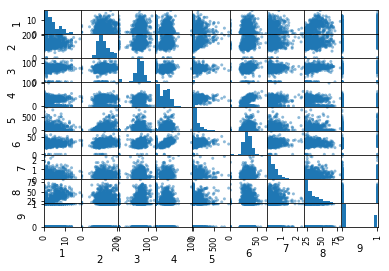

In [7]:
# scatter plot matrix
scatter_matrix(df)
plt.show()

## Patition the dataset into train (66%) and test (33%)

In [11]:
noofSamples= len(df)-1

# Extracting Features from dataset 
X = df[['1','2','3','4','5','6','7','8']]
X = X.as_matrix()
print(X[0])

# Extracting labels column from dataset
Y = df[['9']]
Y =Y.as_matrix().flatten()
print(Y)
validation_size = 0.33

seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

print('Lenth of Trainging set:\n',len(X_train),"\n")
print('Lenth of Test set:\n',len(X_validation),"\n")

[   6.     148.      72.      35.       0.      33.6      0.627   50.   ]
[1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0
 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1
 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0
 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0
 1 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0
 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 1 1 0 0 1 0 1 0 0 0 1
 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 1 1 0 0 1 0 0 1 0 0 1
 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 1 0 1 1 0 1 0 1 0 1
 0 1 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1
 1 1 0 0 1 0 0 1 0 0 0 1 0

## Learn a decision tree classifier from training dataset

In [15]:
DT = DecisionTreeClassifier()
DT.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

## Make predictions on test dataset

In [16]:
predictions = DT.predict(X_validation)

## Evalutate Classifier accuracy

In [17]:
print('Accuracy:\n',accuracy_score(Y_validation, predictions),"\n")
print('Confusion Matrix:\n',confusion_matrix(Y_validation, predictions),"\n")
print('Classification Report:\n',classification_report(Y_validation, predictions),"\n")

Accuracy:
 0.692913385827 

Confusion Matrix:
 [[127  35]
 [ 43  49]] 

Classification Report:
              precision    recall  f1-score   support

          0       0.75      0.78      0.77       162
          1       0.58      0.53      0.56        92

avg / total       0.69      0.69      0.69       254
 



## Perform 10-fold cross validation and compute accuracy 

In [18]:
# Cross Validation
seed = 10
scoring = 'accuracy'
kfold = model_selection.KFold(n_splits=10, random_state=seed)
cv_results = model_selection.cross_val_score(DT, X_train, Y_train, cv=kfold, scoring=scoring)
print(cv_results)
print(sum(cv_results)/10)

[ 0.76923077  0.65384615  0.73076923  0.71153846  0.58823529  0.7254902
  0.76470588  0.84313725  0.68627451  0.64705882]
0.712028657617


## Logistic Regression

In [195]:
LR = LogisticRegression()
LR.fit(X_train, Y_train)
predictions = LR.predict(X_validation)

print('Accuracy:\n',accuracy_score(Y_validation, predictions),"\n")
print('Confusion Matrix:\n',confusion_matrix(Y_validation, predictions),"\n")
print('Classification Report:\n',classification_report(Y_validation, predictions),"\n")

Accuracy:
 0.755905511811 

Confusion Matrix:
 [[141  21]
 [ 41  51]] 

Classification Report:
              precision    recall  f1-score   support

          0       0.77      0.87      0.82       162
          1       0.71      0.55      0.62        92

avg / total       0.75      0.76      0.75       254
 



## K-Neighbors Classifier

In [196]:
KN = KNeighborsClassifier()
KN.fit(X_train, Y_train)
predictions = KN.predict(X_validation)

print('Accuracy:\n',accuracy_score(Y_validation, predictions),"\n")
print('Confusion Matrix:\n',confusion_matrix(Y_validation, predictions),"\n")
print('Classification Report:\n',classification_report(Y_validation, predictions),"\n")

Accuracy:
 0.692913385827 

Confusion Matrix:
 [[129  33]
 [ 45  47]] 

Classification Report:
              precision    recall  f1-score   support

          0       0.74      0.80      0.77       162
          1       0.59      0.51      0.55        92

avg / total       0.69      0.69      0.69       254
 



## Linear Discriminant Analysis

In [197]:
LDA = LinearDiscriminantAnalysis()
LDA.fit(X_train, Y_train)
predictions = LDA.predict(X_validation)

print('Accuracy:\n',accuracy_score(Y_validation, predictions),"\n")
print('Confusion Matrix:\n',confusion_matrix(Y_validation, predictions),"\n")
print('Classification Report:\n',classification_report(Y_validation, predictions),"\n")

Accuracy:
 0.771653543307 

Confusion Matrix:
 [[140  22]
 [ 36  56]] 

Classification Report:
              precision    recall  f1-score   support

          0       0.80      0.86      0.83       162
          1       0.72      0.61      0.66        92

avg / total       0.77      0.77      0.77       254
 



## Gaussian Naive Bayes

In [198]:
GNB = GaussianNB()
GNB.fit(X_train, Y_train)
predictions = GNB.predict(X_validation)

print('Accuracy:\n',accuracy_score(Y_validation, predictions),"\n")
print('Confusion Matrix:\n',confusion_matrix(Y_validation, predictions),"\n")
print('Classification Report:\n',classification_report(Y_validation, predictions),"\n")

Accuracy:
 0.744094488189 

Confusion Matrix:
 [[129  33]
 [ 32  60]] 

Classification Report:
              precision    recall  f1-score   support

          0       0.80      0.80      0.80       162
          1       0.65      0.65      0.65        92

avg / total       0.74      0.74      0.74       254
 



## Support Vector Machine

In [199]:
SVC = SVC()
SVC.fit(X_train, Y_train)
predictions = SVC.predict(X_validation)

print('Accuracy:\n',accuracy_score(Y_validation, predictions),"\n")
print('Confusion Matrix:\n',confusion_matrix(Y_validation, predictions),"\n")
print('Classification Report:\n',classification_report(Y_validation, predictions),"\n")

Accuracy:
 0.637795275591 

Confusion Matrix:
 [[162   0]
 [ 92   0]] 

Classification Report:
              precision    recall  f1-score   support

          0       0.64      1.00      0.78       162
          1       0.00      0.00      0.00        92

avg / total       0.41      0.64      0.50       254
 



C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
